<a href="https://colab.research.google.com/github/DanielKorenDataScience/ClassificationProject/blob/main/Work_in_Process/Shufersal_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classification Project - SWEETS predict


for Shufersal on-line orders, for replacing of missing products, will predict the replacement success!

In [22]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import display
p = print
d = display

# Get Data

## Raw Data

In [23]:
id = ''  # name of result file
prefix = 'Shufersal'

RAW = True
DIFF = False

In [24]:
def get_raw(fname, subdir=''):
  data_url = 'https://raw.githubusercontent.com/DanielKorenDataScience/ClassificationProject/main/' + subdir + fname
  resp = requests.get(data_url)
  text = resp.text
  
  if len(text) > 100:
    with open(fname, 'w') as fh:
      fh.write(text)

In [25]:
def diff_list(li1, li2):
  p(len(li1), len(li2))
  return [i for i in li1 + li2 if i not in li1 or i not in li2]

In [26]:
if RAW:
  fname = 'Sweets.csv'
  get_raw(fname)    
  df1 = pd.read_csv(fname, encoding='utf-8', nrows=1)
  df2 = pd.read_csv(fname, encoding='utf-8', usecols=[i for i in range(82) if not i in[0,8,10,12,14,16,18,20,24,26,27,48,50,52,54,56,58,62,64,65]])
  d(df1)

,OrderNumbert,HouseHoldID,LocationCityName,QuarterNumber,MonthNumber,WeekNumber,DayNumberInWeek,PeriodHoliday,TransactionDate,DepartmentCode,DepartmentName,CategoryCode,CategoryName,GroupCode,GroupName,SubGroupCode,SubGroupName,CompoundID,CompoundIDDesc,ParentProductNumber,ProductDescription,BrandIndDesc,BrandName,VendorNumber,VendorName,UnitOfMeasure,ItemsPerPackageWH,DescriptionTavit,Price,Quantity,cntPrdAll,NetSaleAmountAll,NetSaleNoVatPrdLast3Months,QuantSale,cntMonths,DiscountPerUnit,isPromo,Energy,Pachmema,Natran,...,ShumanRavuy,ShumanTrans,Colastrol,SivimTzunatim,CafiotSucar,DepartmentCodeSubs,DepartmentNameSusb,CategoryCodeSubs,CategoryNameSubs,GroupCodeSubs,GroupNameSubs,SubGroupCodeSubs,SubGroupNameSubs,CompoundIDSubs,CompoundIDDescSubs,ProductNumberSubs,ProductDescriptionSubs,BrandIndDescSuss,BrandNameSubs,VendorNumberSubs,VendorNameSubs,UnitOfMeasureSubs,ItemsPerPackageWHSubs,DescriptionTavitSubs,PriceSubs,NetSaleNoVatPrdSubs,QuantSaleSubs,cntMonthsSubs,DiscountPerUnitSubs,EnergySubs,PachmemaSubs,NatranSubs,HelbonSubs,ShumanSubs,ShumanRavuySubs,ShumanTransSubs,ColastrolSubs,SivimTzunatimSubs,CafiotSucarSusb,CorrelateItemStatusCode
0,40052,1,ראשון לציון,202101,202102,202108,1,NotHoliday,21/02/2021,10,10-מזון יבש,6,מתוקים,700,חטיפים מתוקים,3,שקיות גדולות/קטנות,-8000500249352,205קינדר בואנו מיני מיקס,8000500249352,205קינדר בואנו מיני מיקס,קינדר,לא מותג פרטי,914547,פרימיום-חברה לדברי מתיקה,0.205,15,205 גרם,18.9,4,22,800.63,57747.16,0.8,16,NaN,noPromo,568,49.5,107,...,17.3,0.5,15,NaN,NaN,10,10-מזון יבש,6,מתוקים,700,חטיפים מתוקים,6,חטיפי ילדים,-8000500217740,קינדר בואנו מיני 86 גרם,8000500217740,קינדר בואנו מיני 86 גרם,קינדר,לא מותג פרטי,914547,פרימיום-חברה לדברי מתיקה,0.086,12,86 גרם,9.9,46128.25,0.8,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


Eliminating unwanted columns - mostly descriptive columns

In [27]:
if RAW:
  d(diff_list(list(df1.columns), list(df2.columns)))

82 62


['OrderNumbert',
 'TransactionDate',
 'DepartmentName',
 'CategoryName',
 'GroupName',
 'SubGroupName',
 'CompoundIDDesc',
 'ProductDescription',
 'VendorName',
 'ItemsPerPackageWH',
 'DescriptionTavit',
 'DepartmentNameSusb',
 'CategoryNameSubs',
 'GroupNameSubs',
 'SubGroupNameSubs',
 'CompoundIDDescSubs',
 'ProductDescriptionSubs',
 'VendorNameSubs',
 'ItemsPerPackageWHSubs',
 'DescriptionTavitSubs']

In [28]:
if RAW:
  d(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54460 entries, 0 to 54459
Data columns (total 62 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   HouseHoldID                 54460 non-null  int64  
 1   LocationCityName            54460 non-null  object 
 2   QuarterNumber               54460 non-null  int64  
 3   MonthNumber                 54460 non-null  int64  
 4   WeekNumber                  54460 non-null  int64  
 5   DayNumberInWeek             54460 non-null  int64  
 6   PeriodHoliday               54460 non-null  object 
 7   DepartmentCode              54460 non-null  int64  
 8   CategoryCode                54460 non-null  int64  
 9   GroupCode                   54460 non-null  int64  
 10  SubGroupCode                54460 non-null  int64  
 11  CompoundID                  54460 non-null  int64  
 12  ParentProductNumber         54460 non-null  int64  
 13  BrandIndDesc                544

None

In [29]:
# Fix Typo mistake
if RAW: 
  df2.rename(columns={'OrderNumbert': 'OrderNumber','BrandIndDescSuss': 'BrandIndDescSubs', 'ProductNumberSubs': 'ParentProductNumberSubs', 
                    'NetSaleNoVatPrdSubs': 'NetSaleNoVatPrdLast3MonthsSubs', 'CafiotSucarSusb': 'CafiotSucarSubs'}, inplace=True)

Eliminating nulls

In [30]:
# Fill na
if RAW:
  df2.fillna({'QuantSale': 1, 'QuantSaleSubs': 1}, inplace=True)
  df2.fillna(0, inplace=True)
  d(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54460 entries, 0 to 54459
Data columns (total 62 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   HouseHoldID                     54460 non-null  int64  
 1   LocationCityName                54460 non-null  object 
 2   QuarterNumber                   54460 non-null  int64  
 3   MonthNumber                     54460 non-null  int64  
 4   WeekNumber                      54460 non-null  int64  
 5   DayNumberInWeek                 54460 non-null  int64  
 6   PeriodHoliday                   54460 non-null  object 
 7   DepartmentCode                  54460 non-null  int64  
 8   CategoryCode                    54460 non-null  int64  
 9   GroupCode                       54460 non-null  int64  
 10  SubGroupCode                    54460 non-null  int64  
 11  CompoundID                      54460 non-null  int64  
 12  ParentProductNumber             

None

## Remove duplicates

### remove features thar are not related to the product

In [31]:
df2.columns

Index(['HouseHoldID', 'LocationCityName', 'QuarterNumber', 'MonthNumber',
       'WeekNumber', 'DayNumberInWeek', 'PeriodHoliday', 'DepartmentCode',
       'CategoryCode', 'GroupCode', 'SubGroupCode', 'CompoundID',
       'ParentProductNumber', 'BrandIndDesc', 'BrandName', 'VendorNumber',
       'UnitOfMeasure', 'Price', 'Quantity', 'cntPrdAll', 'NetSaleAmountAll',
       'NetSaleNoVatPrdLast3Months', 'QuantSale', 'cntMonths',
       'DiscountPerUnit', 'isPromo', 'Energy', 'Pachmema', 'Natran', 'Helbon',
       'Shuman', 'ShumanRavuy', 'ShumanTrans', 'Colastrol', 'SivimTzunatim',
       'CafiotSucar', 'DepartmentCodeSubs', 'CategoryCodeSubs',
       'GroupCodeSubs', 'SubGroupCodeSubs', 'CompoundIDSubs',
       'ParentProductNumberSubs', 'BrandIndDescSubs', 'BrandNameSubs',
       'VendorNumberSubs', 'UnitOfMeasureSubs', 'PriceSubs',
       'NetSaleNoVatPrdLast3MonthsSubs', 'QuantSaleSubs', 'cntMonthsSubs',
       'DiscountPerUnitSubs', 'EnergySubs', 'PachmemaSubs', 'NatranSubs',
      

## Prepare master and subs datasets

The following features are needed in order to predict - we do not predict based on a productId alone, but also on sales info


In [32]:
cols_master = ['NetSaleNoVatPrdLast3Months', 'QuantSale', 'cntMonths']
cols_subs = ['NetSaleNoVatPrdLast3MonthsSubs', 'QuantSaleSubs', 'cntMonthsSubs']
 # we have to choose the last price in the qtr for each product as part of it's feature' assuming it will not change too much in the next qtr

In [33]:
if RAW:
  cols = ['HouseHoldID', 'LocationCityName', 'QuarterNumber', 'MonthNumber',
       'WeekNumber', 'DayNumberInWeek', 'PeriodHoliday', 'cntPrdAll', 'NetSaleAmountAll',
       'Quantity', 'DiscountPerUnit', 'DiscountPerUnitSubs']
  df = df2.drop(cols, axis=1)

  cols = ['CorrelateItemStatusCode', 'Price', 'PriceSubs']
  df3 = df.drop(cols, axis=1)

  df_no_promo = df3.drop('isPromo', axis=1)
  df_org = df.drop('isPromo', axis=1) 

  cols = ['isPromo', 'DepartmentCodeSubs', 'CategoryCodeSubs', 
       'GroupCodeSubs', 'SubGroupCodeSubs', 'CompoundIDSubs',
       'ParentProductNumberSubs', 'BrandIndDescSubs', 'BrandNameSubs',
       'VendorNumberSubs', 'UnitOfMeasureSubs', 
       'EnergySubs', 'PachmemaSubs', 'NatranSubs', 
       'HelbonSubs', 'ShumanSubs', 'ShumanRavuySubs', 'ShumanTransSubs',
       'ColastrolSubs', 'SivimTzunatimSubs', 'CafiotSucarSubs',
       'NetSaleNoVatPrdLast3MonthsSubs', 'QuantSaleSubs', 'cntMonthsSubs']
  df_master = df3.drop(cols, axis=1)

  cols = ['isPromo', 'DepartmentCode', 'CategoryCode', 
        'GroupCode', 'SubGroupCode', 'CompoundID', 
       'ParentProductNumber', 'BrandIndDesc', 'BrandName', 
       'VendorNumber', 'UnitOfMeasure',
       'Energy', 'Pachmema', 'Natran', 'Helbon',
       'Shuman', 'ShumanRavuy', 'ShumanTrans', 'Colastrol', 'SivimTzunatim',
       'CafiotSucar', 'NetSaleNoVatPrdLast3Months', 'QuantSale', 'cntMonths']
  df_subs = df3.drop(cols, axis=1)

  p(df.shape, df_no_promo.shape, df_master.shape, df_subs.shape)

(54460, 50) (54460, 46) (54460, 23) (54460, 23)


### Check uniqueness of master and susb products

In [34]:
df.drop_duplicates(inplace=True)
p(df.shape)

(15050, 50)


In [35]:
df_no_promo.drop_duplicates(inplace=True)
p(df_no_promo.shape)

(5278, 46)


In [36]:
df_master.drop_duplicates(inplace=True)
p(df_master.shape)
#d(df_master.head())

(587, 23)


In [37]:
# first group 471 - ['DepartmentCode', 'CategoryCode', 'GroupCode','SubGroupCode', 'CompoundID', 'BrandName', 'VendorNumber',
#             'Shuman', 'ShumanRavuy', 'Colastrol', 'SivimTzunatim', 'CafiotSucar'] did not change that number
val = pd.DataFrame(df_master.value_counts(['ParentProductNumber']))#, 'BrandIndDesc', 'UnitOfMeasure', 
#                        'Energy', 'Pachmema', 'Natran', 'Helbon', 'ShumanTrans']))
#val.reset_index(inplace=True)
#val.ParentProductNumber = val.ParentProductNumber.astype('int')
d(val)

,0
ParentProductNumber,
9044400231009,1
4009900484305,1
4009900534611,1
4009900534581,1
4009900532327,1
...,...
7290112358011,1
7290112357892,1
7290112357618,1


In [38]:
df_subs.drop_duplicates(inplace=True)
p(df_subs.shape)
#d(df_subs.head())

(688, 23)


In [39]:
val = pd.DataFrame(df_subs.value_counts(['ParentProductNumberSubs']))#, 'BrandIndDescSubs', 'UnitOfMeasureSubs', 
#                        'EnergySubs', 'PachmemaSubs', 'NatranSubs', 'HelbonSubs', 'ShumanTransSubs']))
val

,0
ParentProductNumberSubs,
9044400841000,1
4014400904390,1
4025700001962,1
4025700001023,1
4014400927573,1
...,...
7290112495273,1
7290112494313,1
7290112494290,1


## Copy prepared data

In [40]:
df = df_org.copy()

## Encoding categories

In [41]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

if RAW and False:
  enc.fit(['PromoSusbDiffPromo', 'PromoSusbSamePromo', 'noPromo'])
  p(df.isPromo.value_counts())
  p()
  df.isPromo = enc.transform(df.isPromo)
  p(df.isPromo.value_counts())

In [42]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
if RAW:
  df['BrandIndDescSubs'] = df['BrandIndDescSubs'].astype('str')
  for col in ['BrandIndDesc', 'BrandName', 'BrandNameSubs', 'BrandIndDescSubs']:
    p(col)
    p(pd.DataFrame(df[col].value_counts()).index)
    df[col] = enc.fit_transform(df[col])
    p(pd.DataFrame(df[col].value_counts()).index)

BrandIndDesc
Index(['פרה', 'קינדר', 'עלית', 'קליק', 'שופרסל', 'M&M', 'מאסט', 'מילקה',
       'לינדט', 'אורביט', 'יוגטה', 'מנטוס', 'פסק זמן', 'שטראוס', 'ספלנדיד',
       'טוויקס', 'נסטלה', 'גודייבה', 'ריטר ספורט', 'פריי', 'סקיטלס', 'פשקס',
       'צ'וקטה', 'ורד הגליל', 'כרמית', 'פררו', 'סניקרס', 'הרשי', 'מליטיזרס',
       'טיק טק', 'FIVE', 'ורטר', 'מוצרט', 'אתי', 'שטורק', 'איירוויבז', 'לואקר',
       'הריבו', 'לריטייר', 'מרס', 'מנבו', 'טופיפי', 'DISNEY', 'פיקניק',
       'מייק&אייק', 'באונטי', 'בי קיינד', 'נוטלה', 'קדבורי', 'פרניגוטי',
       'קוטדור', 'טובלרון', 'הובה בובה', 'ORIGINAL', 'באצ'י', 'פז', 'המלט',
       'שוקול'ס', 'הולי קקאו'],
      dtype='object')
Int64Index([44, 52, 40, 53, 55,  2, 27, 30, 25,  4, 22, 33, 43, 58, 38, 19, 36,
            10, 54, 45, 39, 48, 49, 16, 23, 47, 37, 15, 31, 21,  1, 17, 28,  6,
            57,  5, 24, 14, 26, 34, 32, 20,  0, 42, 29,  7,  9, 35, 50, 46, 11,
             3, 18, 51,  8, 41, 13, 12, 56],
           dtype='int64')
BrandName
Index(['

## Combine 'GroupCode' and 'SubGroupCode' into one column

In [43]:
if RAW:
  d(df.head(2))
  df.GroupCode = df.GroupCode * 10 + df.SubGroupCode
  df.GroupCodeSubs = df.GroupCodeSubs * 10 + df.SubGroupCodeSubs
 # df.drop(['SubGroupCode', 'SubGroupCodeSubs'], axis=1, inplace=True)
  d(df.head(2))

,DepartmentCode,CategoryCode,GroupCode,SubGroupCode,CompoundID,ParentProductNumber,BrandIndDesc,BrandName,VendorNumber,UnitOfMeasure,Price,NetSaleNoVatPrdLast3Months,QuantSale,cntMonths,Energy,Pachmema,Natran,Helbon,Shuman,ShumanRavuy,ShumanTrans,Colastrol,SivimTzunatim,CafiotSucar,DepartmentCodeSubs,CategoryCodeSubs,GroupCodeSubs,SubGroupCodeSubs,CompoundIDSubs,ParentProductNumberSubs,BrandIndDescSubs,BrandNameSubs,VendorNumberSubs,UnitOfMeasureSubs,PriceSubs,NetSaleNoVatPrdLast3MonthsSubs,QuantSaleSubs,cntMonthsSubs,EnergySubs,PachmemaSubs,NatranSubs,HelbonSubs,ShumanSubs,ShumanRavuySubs,ShumanTransSubs,ColastrolSubs,SivimTzunatimSubs,CafiotSucarSubs,CorrelateItemStatusCode
0,10,6,700,3,-8000500249352,8000500249352,52,0,914547,0.205,18.9,57747.16,0.8,16,568.0,49.5,107.0,8.6,37.8,17.3,0.5,15.0,0.0,0.00,10,6,700,6,-8000500217740,8000500217740,67,0,914547,0.086,9.9,46128.25,0.8,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1
1,10,6,699,4,2900,178134,44,0,912069,0.400,19.6,141798.59,0.6,16,514.0,51.0,0.0,5.3,31.0,19.2,0.5,0.0,0.0,12.25,10,6,699,4,23107,7290100852576,58,0,912069,0.300,10.0,67947.93,0.8,15,514.0,51.0,0.0,5.3,31.0,19.2,0.5,0.0,0.0,12.25,1


,DepartmentCode,CategoryCode,GroupCode,SubGroupCode,CompoundID,ParentProductNumber,BrandIndDesc,BrandName,VendorNumber,UnitOfMeasure,Price,NetSaleNoVatPrdLast3Months,QuantSale,cntMonths,Energy,Pachmema,Natran,Helbon,Shuman,ShumanRavuy,ShumanTrans,Colastrol,SivimTzunatim,CafiotSucar,DepartmentCodeSubs,CategoryCodeSubs,GroupCodeSubs,SubGroupCodeSubs,CompoundIDSubs,ParentProductNumberSubs,BrandIndDescSubs,BrandNameSubs,VendorNumberSubs,UnitOfMeasureSubs,PriceSubs,NetSaleNoVatPrdLast3MonthsSubs,QuantSaleSubs,cntMonthsSubs,EnergySubs,PachmemaSubs,NatranSubs,HelbonSubs,ShumanSubs,ShumanRavuySubs,ShumanTransSubs,ColastrolSubs,SivimTzunatimSubs,CafiotSucarSubs,CorrelateItemStatusCode
0,10,6,7003,3,-8000500249352,8000500249352,52,0,914547,0.205,18.9,57747.16,0.8,16,568.0,49.5,107.0,8.6,37.8,17.3,0.5,15.0,0.0,0.00,10,6,7006,6,-8000500217740,8000500217740,67,0,914547,0.086,9.9,46128.25,0.8,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1
1,10,6,6994,4,2900,178134,44,0,912069,0.400,19.6,141798.59,0.6,16,514.0,51.0,0.0,5.3,31.0,19.2,0.5,0.0,0.0,12.25,10,6,6994,4,23107,7290100852576,58,0,912069,0.300,10.0,67947.93,0.8,15,514.0,51.0,0.0,5.3,31.0,19.2,0.5,0.0,0.0,12.25,1


## Use Dummies

Minimal improvement - FalseNegative (0,0) improved from 1338 to 1328

In [44]:
## Converting the categories column (isPromo) to dummies column - if exists in the dataSet
if RAW:
  p(df.shape)
  try:
    df = pd.get_dummies(df, columns=['isPromo', 'PeriodHoliday'])
    p(df.shape)
  except:
    pass

(54460, 49)


In [45]:
if RAW:
  df_t = df.copy()

## Calc diff vector

In [46]:
if RAW:
  p(df.columns)

Index(['DepartmentCode', 'CategoryCode', 'GroupCode', 'SubGroupCode',
       'CompoundID', 'ParentProductNumber', 'BrandIndDesc', 'BrandName',
       'VendorNumber', 'UnitOfMeasure', 'Price', 'NetSaleNoVatPrdLast3Months',
       'QuantSale', 'cntMonths', 'Energy', 'Pachmema', 'Natran', 'Helbon',
       'Shuman', 'ShumanRavuy', 'ShumanTrans', 'Colastrol', 'SivimTzunatim',
       'CafiotSucar', 'DepartmentCodeSubs', 'CategoryCodeSubs',
       'GroupCodeSubs', 'SubGroupCodeSubs', 'CompoundIDSubs',
       'ParentProductNumberSubs', 'BrandIndDescSubs', 'BrandNameSubs',
       'VendorNumberSubs', 'UnitOfMeasureSubs', 'PriceSubs',
       'NetSaleNoVatPrdLast3MonthsSubs', 'QuantSaleSubs', 'cntMonthsSubs',
       'EnergySubs', 'PachmemaSubs', 'NatranSubs', 'HelbonSubs', 'ShumanSubs',
       'ShumanRavuySubs', 'ShumanTransSubs', 'ColastrolSubs',
       'SivimTzunatimSubs', 'CafiotSucarSubs', 'CorrelateItemStatusCode'],
      dtype='object')


In [47]:
if RAW and DIFF:
  for col in ['DepartmentCode', 'CategoryCode', 'GroupCode', #'SubGroupCode',
       'CompoundID', 'ParentProductNumber', 'BrandIndDesc',
       'VendorNumber', 'UnitOfMeasure', 'Price', 'NetSaleNoVatPrdLast3Months', 'Energy', 'Pachmema',
       'Natran', 'Helbon', 'Shuman', 'ShumanRavuy', 'ShumanTrans', 'Colastrol',
       'SivimTzunatim', 'CafiotSucar', 'QuantSale', 'cntMonths', 'DiscountPerUnit']:
    df[col + 'Diff'] = df[col] - df[col + 'Subs']

In [48]:
if RAW and DIFF:
  for col in ['DepartmentCode', 'CategoryCode', 'GroupCode', #'SubGroupCode',
       'CompoundID', 'ParentProductNumber', 'VendorNumber', 'BrandIndDesc']:
    df[col + 'Diff'] = (df[col + 'Diff'] != 0)    # tested both ==0 and !=0 (the result is 1 for one and 0 for the other - no change in the model results)
    df[col + 'Diff'] = enc.fit_transform(df[col + 'Diff'])

In [49]:
## Converting the categories column (isPromo) to dummies column 
if RAW and DIFF and False:
  p(df.shape)
  cols = []
  for col in ['DepartmentCode', 'CategoryCode', 'GroupCode',
        'CompoundID', 'ParentProductNumber', 'VendorNumber', 'BrandIndDesc']:
      cols.append(col)
      cols.append(col + 'Subs')
      cols.append(col + 'Diff')
  df = pd.get_dummies(df, columns=cols)
  p(df.shape)

In [50]:
if RAW and DIFF:
  df.to_csv(prefix + "_with_diff.csv", index = False)

In [51]:
if RAW and DIFF:
  df = pd.read_csv(prefix + '_with_diff.csv', index_col=False)
  p(df.shape)

# Get ready Data

In [52]:
if RAW:
  p(df.shape)
  d(df.head())

(54460, 49)


,DepartmentCode,CategoryCode,GroupCode,SubGroupCode,CompoundID,ParentProductNumber,BrandIndDesc,BrandName,VendorNumber,UnitOfMeasure,Price,NetSaleNoVatPrdLast3Months,QuantSale,cntMonths,Energy,Pachmema,Natran,Helbon,Shuman,ShumanRavuy,ShumanTrans,Colastrol,SivimTzunatim,CafiotSucar,DepartmentCodeSubs,CategoryCodeSubs,GroupCodeSubs,SubGroupCodeSubs,CompoundIDSubs,ParentProductNumberSubs,BrandIndDescSubs,BrandNameSubs,VendorNumberSubs,UnitOfMeasureSubs,PriceSubs,NetSaleNoVatPrdLast3MonthsSubs,QuantSaleSubs,cntMonthsSubs,EnergySubs,PachmemaSubs,NatranSubs,HelbonSubs,ShumanSubs,ShumanRavuySubs,ShumanTransSubs,ColastrolSubs,SivimTzunatimSubs,CafiotSucarSubs,CorrelateItemStatusCode
0,10,6,7003,3,-8000500249352,8000500249352,52,0,914547,0.205,18.90,57747.16,0.8,16,568.0,49.5,107.0,8.6,37.8,17.3,0.5,15.0,0.0,0.00,10,6,7006,6,-8000500217740,8000500217740,67,0,914547,0.086,9.90,46128.25,0.8,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1
1,10,6,6994,4,2900,178134,44,0,912069,0.400,19.60,141798.59,0.6,16,514.0,51.0,0.0,5.3,31.0,19.2,0.5,0.0,0.0,12.25,10,6,6994,4,23107,7290100852576,58,0,912069,0.300,10.00,67947.93,0.8,15,514.0,51.0,0.0,5.3,31.0,19.2,0.5,0.0,0.0,12.25,1
2,10,6,6993,3,12043,7610400091060,25,0,912317,0.100,14.90,80904.21,0.7,11,534.0,51.0,34.0,6.9,32.0,17.0,0.5,10.0,0.0,11.50,10,6,6993,3,36777,8690766156404,16,0,910165,0.090,9.90,20718.49,1.0,13,532.0,51.0,21.0,6.5,30.0,18.0,0.5,7.5,7.8,12.00,0
3,10,6,6992,2,8579,7290112490124,53,0,912268,0.085,2.95,18277.75,1.0,14,527.0,67.4,117.0,7.4,25.3,16.3,0.5,11.0,0.0,12.75,10,6,6992,2,8579,7290107649605,69,0,912268,0.085,2.95,32291.02,0.9,16,506.0,64.2,132.0,8.1,24.1,14.9,0.5,8.0,0.0,12.50,1
4,10,6,6993,3,30727,7296073382416,55,1,913725,0.100,8.00,45785.99,0.8,16,607.0,13.0,10.0,11.0,53.0,32.0,0.5,0.0,17.0,2.00,10,6,6993,3,30727,7296073237631,71,1,913725,0.100,8.00,41347.56,0.9,16,603.0,23.0,10.0,8.7,50.0,30.0,0.5,0.0,13.0,4.50,1


In [53]:
if not RAW: # so not to use df_ratio
  df = pd.read_csv(prefix + '_with_diff.csv', encoding='ISO-8859-8')
  p(df.shape)
  d(df.head())

In [54]:
p(df.shape)
df.head(1)

(54460, 49)


,DepartmentCode,CategoryCode,GroupCode,SubGroupCode,CompoundID,ParentProductNumber,BrandIndDesc,BrandName,VendorNumber,UnitOfMeasure,Price,NetSaleNoVatPrdLast3Months,QuantSale,cntMonths,Energy,Pachmema,Natran,Helbon,Shuman,ShumanRavuy,ShumanTrans,Colastrol,SivimTzunatim,CafiotSucar,DepartmentCodeSubs,CategoryCodeSubs,GroupCodeSubs,SubGroupCodeSubs,CompoundIDSubs,ParentProductNumberSubs,BrandIndDescSubs,BrandNameSubs,VendorNumberSubs,UnitOfMeasureSubs,PriceSubs,NetSaleNoVatPrdLast3MonthsSubs,QuantSaleSubs,cntMonthsSubs,EnergySubs,PachmemaSubs,NatranSubs,HelbonSubs,ShumanSubs,ShumanRavuySubs,ShumanTransSubs,ColastrolSubs,SivimTzunatimSubs,CafiotSucarSubs,CorrelateItemStatusCode
0,10,6,7003,3,-8000500249352,8000500249352,52,0,914547,0.205,18.9,57747.16,0.8,16,568.0,49.5,107.0,8.6,37.8,17.3,0.5,15.0,0.0,0.0,10,6,7006,6,-8000500217740,8000500217740,67,0,914547,0.086,9.9,46128.25,0.8,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


# Models


## Models - process_model code

In [55]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import math

pd.set_option("precision", 2)
df_result = pd.DataFrame()

In [56]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

X = df.drop('CorrelateItemStatusCode', axis=1)
y = df.CorrelateItemStatusCode.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

In [57]:
def report(clf, X, y, note, test, data_type='Test'):
  global df_result
  name = type(clf).__name__ + ': ' + data_type
  acc = accuracy_score(y_true=y, y_pred=clf.predict(X))
  index = [(name, clf.classes_[0]), (name, clf.classes_[1])]
  cm = pd.DataFrame(confusion_matrix(y_true=y, y_pred=clf.predict(X)),
                    index=clf.classes_,
                    columns=clf.classes_)
  cm.reset_index(drop=True, inplace=True)
  rep = classification_report(y_true=y, y_pred=clf.predict(X), zero_division=1, output_dict=True)
  rep =  pd.DataFrame(rep)
  rep = rep.T
  rep['accuracy'] = acc
  rep.support = rep.support.astype(int)
  cols = list(rep.columns[:3]) + ['accuracy', 'support']
  rep = rep[cols]
  rep['precision_avg'] = rep.precision['macro avg']
  rep['recall_avg'] = rep.recall['macro avg']
  rep['f1-score_avg'] = rep['f1-score']['macro avg']
  rep.drop(['accuracy', 'macro avg', 'weighted avg'], axis=0, inplace=True)
  rep.reset_index(drop=True, inplace=True)
  df = cm.join(rep)
  df['name'] = name
  df['note'] = note
  df.loc[1, 'note'] = ''
  if test:  # do not add to database
    d(df)
  else:    
    df.reset_index(inplace=True)
    df_result.reset_index(inplace=True)
    df_result = df_result.append(df, ignore_index=True)
    df_result.set_index(['name', 'index'], inplace=True)
  return df_result

In [58]:
def showFeatureImportance(model, X, threshold):
  if type(model).__name__ == 'LogisticRegression':  # no features importance data
    w0 = model.intercept_[0]
    w = model.coef_[0]
    fx_imp = pd.Series(w, index=X.columns)
  else:
    fx_imp = pd.Series(model.feature_importances_, index=X.columns)
  fx_imp /= fx_imp.sum()
  fx_imp = fx_imp.sort_values()
  fx_imp = fx_imp[fx_imp > threshold]
  fig = plt.figure(figsize=(5,5))
  plt.xlim(0, 1)
  fx_imp.plot(kind='barh', title=type(model).__name__ )

In [59]:
def process_model(model, X, y, X_test, y_test, plot=False, threshold=0, note='', test=False):
  p('running: ', type(model).__name__, X.shape)
  model.fit(X, y)
  report(model, X, y, note, test, 'Train')
  report(model, X_test, y_test, note, test)
  if plot:
    showFeatureImportance(model, X, threshold)
  return df_result 

In [60]:
from sklearn.linear_model import LogisticRegression, BayesianRidge, Lasso, Ridge
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingRegressor, BaggingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC


## Models - Run process_model

running:  RandomForestClassifier (38122, 48)


0  ...                                               note
name                          index          ...                                                   
RandomForestClassifier: Train 0      9081.0  ...  n_estimators=100, criterion='entropy', max_dep...
                              1      2218.0  ...                                                   
RandomForestClassifier: Test  0      3711.0  ...  n_estimators=100, criterion='entropy', max_dep...
                              1      1076.0  ...                                                   

[4 rows x 11 columns]

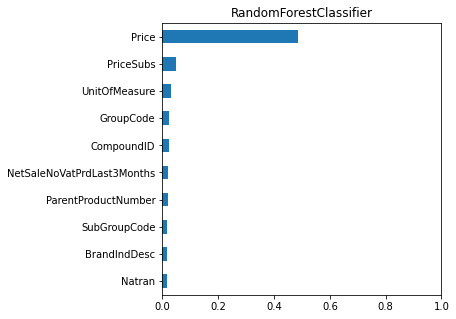

In [61]:
df_result = pd.DataFrame()

clf_RF = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=None, min_samples_split=20, ccp_alpha=0.0003, random_state=73)
process_model(clf_RF, X_train, y_train, X_test, y_test, plot=True, threshold=0.015, note="n_estimators=100, criterion='entropy', max_depth=None, min_samples_split=20, ccp_alpha=0.0003, random_state=73")

d(df_result)

#fname = prefix + f'_result_{id}.csv'
#df_result.to_csv(fname, index = True)

# Prepare a list of subs for each master

In [62]:
df.head(1)[['ParentProductNumber', 'Price', 'PriceSubs']]

,ParentProductNumber,Price,PriceSubs
0,8000500249352,18.9,9.9


In [63]:
prd_no = 161631
mask = (df.ParentProductNumber == prd_no)
df[mask].value_counts('ParentProductNumberSubs').index

Int64Index([     72909799,        161648, 7290112497918,      72917893,
            5000159407236, 7290112495556, 7290112494283, 3800020423578,
                 72917367, 7290115670301, 7290112490124, 5000159461122,
                 72994061,      72917329],
           dtype='int64', name='ParentProductNumberSubs')

In [64]:
prd_no = 56845
mask = (df.ParentProductNumberSubs == prd_no)
df[mask]

,DepartmentCode,CategoryCode,GroupCode,SubGroupCode,CompoundID,ParentProductNumber,BrandIndDesc,BrandName,VendorNumber,UnitOfMeasure,Price,NetSaleNoVatPrdLast3Months,QuantSale,cntMonths,Energy,Pachmema,Natran,Helbon,Shuman,ShumanRavuy,ShumanTrans,Colastrol,SivimTzunatim,CafiotSucar,DepartmentCodeSubs,CategoryCodeSubs,GroupCodeSubs,SubGroupCodeSubs,CompoundIDSubs,ParentProductNumberSubs,BrandIndDescSubs,BrandNameSubs,VendorNumberSubs,UnitOfMeasureSubs,PriceSubs,NetSaleNoVatPrdLast3MonthsSubs,QuantSaleSubs,cntMonthsSubs,EnergySubs,PachmemaSubs,NatranSubs,HelbonSubs,ShumanSubs,ShumanRavuySubs,ShumanTransSubs,ColastrolSubs,SivimTzunatimSubs,CafiotSucarSubs,CorrelateItemStatusCode
24592,10,6,7002,2,-8000500082928,8000500082928,52,0,914547,0.08,17.9,18233.84,1.0,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11,21,5492,2,24225,56845,79,0,901212,1.5,8.91,991588.75,0.2,16,120.0,9.9,100.0,6.6,6.0,3.6,0.5,18.0,0.0,0.0,0


In [65]:
model = clf_RF
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0003, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=73, verbose=0,
                       warm_start=False)

In [66]:
p('y_pred:', model.predict(X_test)[0], 'y_test:', y_test[0])

result = pd.DataFrame(model.predict_proba(X))

p('y_pred:', result.iloc[0].values, 'y:', y[0])
p('d')
result.head()

y_pred: 1 y_test: 1
y_pred: [0.16576031 0.83423969] y: 1
d


,0,1
0,0.17,0.83
1,0.06,0.94
2,0.62,0.38
3,0.02,0.98
4,0.12,0.88


In [67]:
result['Product'] = X.ParentProductNumber
result['ProductSubs'] = X.ParentProductNumberSubs
result['Selected'] = y
result['Predicted'] = model.predict(X)
result['Correct'] = (result['Predicted'] == result['Selected'])
result

,0,1,Product,ProductSubs,Selected,Predicted,Correct
0,0.17,0.83,8000500249352,8000500217740,1,1,True
1,0.06,0.94,178134,7290100852576,1,1,True
2,0.62,0.38,7610400091060,8690766156404,0,0,True
3,0.02,0.98,7290112490124,7290107649605,1,1,True
4,0.12,0.88,7296073382416,7296073237631,1,1,True
...,...,...,...,...,...,...,...
54455,0.46,0.54,7622210597915,7622010001858,1,1,True
54456,0.42,0.58,7622210597915,7622210984678,1,1,True
54457,0.50,0.50,7622210597915,4014400923711,1,1,True
54458,0.66,0.34,7622210597915,7622210656117,1,0,False


In [68]:
prd_no = 161631
mask = (result.Product == prd_no)
result[mask].value_counts('ProductSubs')

ProductSubs
72909799         86
161648           45
7290112497918    24
72917893          4
5000159407236     3
7290112495556     2
7290112494283     2
3800020423578     2
72917367          2
7290115670301     1
7290112490124     1
5000159461122     1
72994061          1
72917329          1
dtype: int64

In [69]:
result.drop([0,1], axis=1).groupby(['Product', 'ProductSubs']).agg([('AvgCorrect','mean'),('CountCorrect','count')]).head(10)

Selected               ...    Correct             
                      AvgCorrect CountCorrect  ... AvgCorrect CountCorrect
Product ProductSubs                            ...                        
161631  161648              0.91           45  ...       0.93           45
        72909799            0.88           86  ...       0.88           86
        72917329            1.00            1  ...       1.00            1
        72917367            0.00            2  ...       1.00            2
        72917893            0.50            4  ...       0.50            4
        72994061            1.00            1  ...       1.00            1
        3800020423578       0.00            2  ...       0.50            2
        5000159407236       0.33            3  ...       0.67            3
        5000159461122       0.00            1  ...       1.00            1
        7290112490124       0.00            1  ...       0.00            1

[10 rows x 6 columns]

In [70]:
result_stat = result.drop([0,1], axis=1).groupby(['Product', 'ProductSubs']).agg({'Correct': [('AvgCorrect','mean'),('CountCorrect','count')]})

In [71]:
result_stat.head(15)

Correct             
                      AvgCorrect CountCorrect
Product ProductSubs                          
161631  161648              0.93           45
        72909799            0.88           86
        72917329            1.00            1
        72917367            1.00            2
        72917893            0.50            4
        72994061            1.00            1
        3800020423578       0.50            2
        5000159407236       0.67            3
        5000159461122       1.00            1
        7290112490124       0.00            1
        7290112494283       0.50            2
        7290112495556       1.00            2
        7290112497918       0.92           24
        7290115670301       1.00            1
161648  161631              0.99           71

## List of Product/subs with at least 3 entries in the dataset, and the avgCorrectness of our model compared to actual

In [72]:
mask3 = (result_stat.iloc[:,1] >=3)
df_res = result_stat[mask3]
df_res.head(10)

Correct             
                      AvgCorrect CountCorrect
Product ProductSubs                          
161631  161648              0.93           45
        72909799            0.88           86
        72917893            0.50            4
        5000159407236       0.67            3
        7290112497918       0.92           24
161648  161631              0.99           71
        72909799            0.94           68
        7290112497918       0.94           31
170053  170077              0.73           15
        170275              0.92           50

# Lits of products and their subs, top 3 subs per product based on avgCorrect 

In [73]:
# the next groupby remove the columns from the df, so we trickit and add it to the index - groupby preserve the index
df_recommend = df_res.set_index(('Correct','CountCorrect'), append=True)
df_recommend

Correct
                                                    AvgCorrect
Product       ProductSubs   (Correct, CountCorrect)           
161631        161648        45                            0.93
              72909799      86                            0.88
              72917893      4                             0.50
              5000159407236 3                             0.67
              7290112497918 24                            0.92
...                                                        ...
9002975393836 9002975393829 3                             0.67
9002975393843 7290111353055 13                            0.62
              9002975393836 3                             0.33
              9002975393850 4                             1.00
9002975393850 9002975393812 8                             1.00

[2281 rows x 1 columns]

In [74]:
# now we can use groupby and nlargset to keep the 3 items with the highest AvgCorrect
df_recommend = pd.DataFrame(df_recommend[('Correct','AvgCorrect')].groupby('Product', group_keys=False).nlargest(3))
df_recommend

Correct
                                                    AvgCorrect
Product       ProductSubs   (Correct, CountCorrect)           
161631        161648        45                            0.93
              7290112497918 24                            0.92
              72909799      86                            0.88
161648        161631        71                            0.99
              72909799      68                            0.94
...                                                        ...
9002975393836 9002975393829 3                             0.67
9002975393843 9002975393850 4                             1.00
              7290111353055 13                            0.62
              9002975393836 3                             0.33
9002975393850 9002975393812 8                             1.00

[1283 rows x 1 columns]

In [75]:
df_recommend.reset_index(inplace=True)
df_recommend.set_index(['Product', 'ProductSubs'], inplace=True)
df_recommend

Correct           
                            CountCorrect AvgCorrect
Product       ProductSubs                          
161631        161648                  45       0.93
              7290112497918           24       0.92
              72909799                86       0.88
161648        161631                  71       0.99
              72909799                68       0.94
...                                  ...        ...
9002975393836 9002975393829            3       0.67
9002975393843 9002975393850            4       1.00
              7290111353055           13       0.62
              9002975393836            3       0.33
9002975393850 9002975393812            8       1.00

[1283 rows x 2 columns]

# Compare to Itay list

In [109]:
# due to the fact that the filename includes spaces I could not open it from github
# needed to download locally and then upload to colab
df_itay = pd.read_excel('itay.xlsx')
df_itay.to_csv('itay_recommendation_list.csv')
df_recommend.to_csv('zvi_recommendation_list.csv')
df_itay.set_index(['ParentProductNumber', 'ParentProductNumberSubs'], inplace=True)
df_itay

prdictProbaMean  ...  rankMeanAndStd
ParentProductNumber ParentProductNumberSubs                   ...                
161631              7290112497918                       0.91  ...               1
                    161648                              0.89  ...               2
                    72909799                            0.88  ...               3
161648              7290112497918                       0.91  ...               1
                    72909799                            0.90  ...               2
...                                                      ...  ...             ...
9002975393836       9002975393829                       0.79  ...               1
9002975393843       9002975393850                       0.84  ...               1
                    9002975393836                       0.81  ...               2
                    7290111353055                       0.38  ...               3
9002975393850       9002975393812                       0.83  ...               1

[1283 rows x 4 columns]

In [78]:
df_itay.loc[(161631, 7290112497918)]

prdictProbaMean     0.91
prdictProbaStd      0.12
countRows          24.00
rankMeanAndStd      1.00
Name: (161631, 7290112497918), dtype: float64

In [107]:
def check_exists(idx):
  try:
    df_recommend.loc[idx]
    return True
  except:
    p(idx)
    return False

not_found =[]
for idx in df_itay.index:
  if not check_exists(idx):
    not_found.append(idx)
  break
not_found

[]